# 3. 데이터 전처리 이해와 실무


## 3-1 데이터 정제 – 결측 데이터 처리

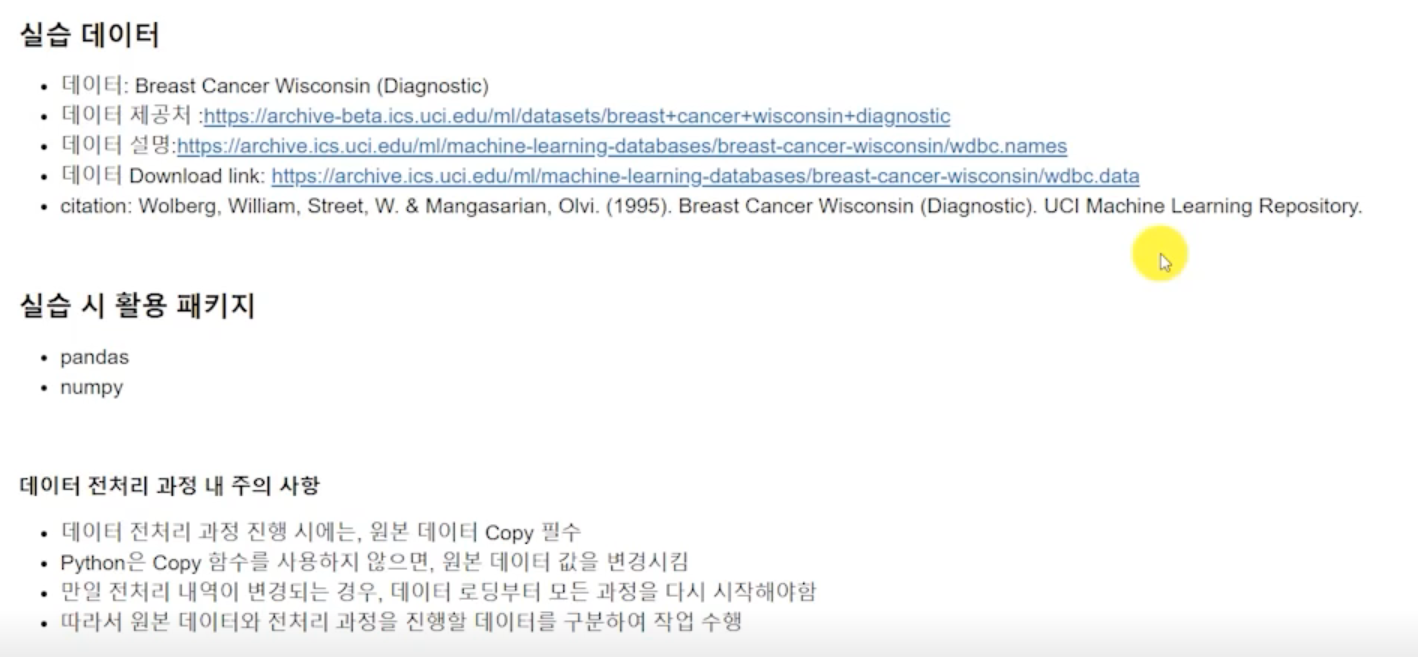

In [15]:
import numpy as np
import pandas as pandas


C:\Users\jh\AppData\Local\Temp\ipykernel_15108\4075864855.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pandas


In [16]:
cancer = pd.read_csv("./wdbc.data", header=None)
cancer # 컬럼이 없으므로 데이터 설명링크 7. attribute information 참조


NameError: name 'pd' is not defined

In [ ]:
cancer.columns = ["id", ]

# id를 인덱스화
cancer = cancer.set_index('id')
cancer

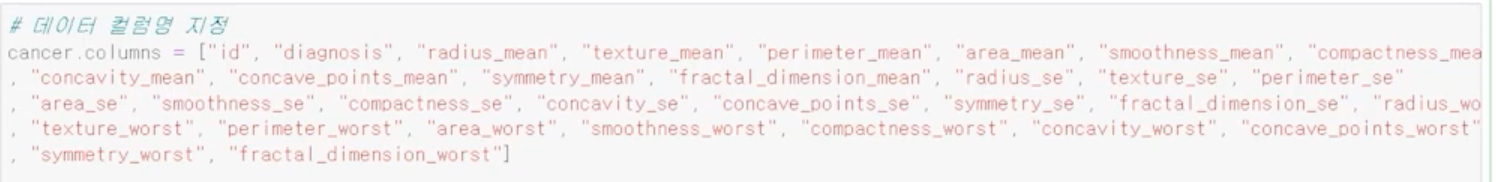

In [ ]:
cancer_data = cancer.copy()
cancer_data

In [ ]:
# 실습용 일부 데이터 선택
cancer_data = cancer_data[0:30]
cancer_data = cancer_data[['diagnosis', 'radius_mean','texture_mean','perimeter_mean','area_mean']]

# 데이터 내 임의 결측치 생성
cancer_data.iloc[2,:] = np.nan # 3행에 모든 데이터 결측치 생성
cancer_data.iloc[5, 0] = np.nan # 6행 1열 결측치 생성
cancer_data.iloc[10, [3,4]] = np.nan # 11행 4,5열
cancer_data.iloc[12, 2:4] = np.nan # 13행 3,4열
cancer_data.iloc[15, [0,3]] = np.nan # 16행 1,4열
cancer_data.iloc[24, 4] = np.nan # 25행 5열

cancer_data

## 결측지 제거

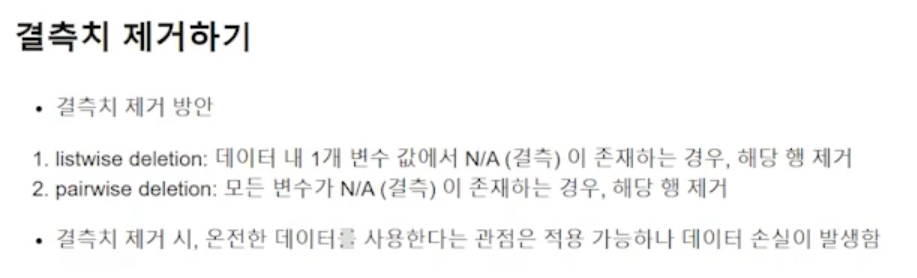

### list wise

In [ ]:
cancer_data.info()

NameError: name 'cancer_data' is not defined

In [ ]:
# 30개 레코드중 6개 레코드에서 결측치 존재함
cancer_copy = cancer_data.copy()
cancer_copy = cancer_copy.dropna()

# 데이터 요약 총 30개 레코드중, 하나의 결측치라도 있는 6개 레코드 삭제
print(cancer_copy.info())

# 데이터 차원
np.shape(cancer_copy)

In [ ]:
cancer_copy

### pariwise

In [ ]:
# 30개 레코드중 1개 레코드에서 모든변수내 결측치 존재
# 모든 레코드에서 결측치 존재할때만 삭제

cancer_copy = cancer_data.copy()
cancer_copy = cancer_copy.dropna(how='all')

# 데이터 요약 총 30개 레코드중, 하나의 결측치라도 있는 6개 레코드 삭제
print(cancer_copy.info())

# 데이터 차원
np.shape(cancer_copy)

In [ ]:
cancer_copy

## 결측치 대체하기

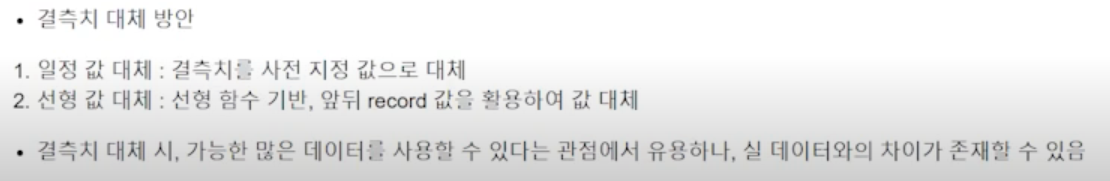

In [ ]:
cancer_copy = cancer_data.copy()
cancer_copy

### 일정값 대체

In [ ]:
# diagnosis 컬램내 결측치는 C라는 범주형 값으로 일괄대체
cancer_copy['diagnosis'] = cancer_copy['diagnosis'].fillna('C')
cancer_copy.head(10)

In [ ]:
# 수치형 컬럼인 radius_mean 컬럼내 결측치는 65라는 값으로 대체
cancer_copy['radius_mean'] = cancer_copy['radius_mean'].fillna(65)
cancer_copy.head(10)

In [ ]:
cancer_copy.info()

In [ ]:
# 평균값으로 대체
cancer_copy['texture_mean'] = cancer_copy['texture_mean'].replace(np.nan, cancer_copy['texture_mean'].mean())
# 동일결과
cancer_copy['texture_mean'] = cancer_copy['texture_mean'].fillna(cancer_copy['texture_mean'].mean())

# 대체된 값과 texture_mean 컬럼의 평균값 비교
# 3번째 record, id 84300903 확인
print(cancer_copy['texture_mean'].mean()) # 이값으로 결측값 대체한지 확인
cancer_copy.head(10)


## 선형값 대체
- 데이터 앞,뒤 레코드 값을 기반으로 결측치 대체 (선형보간법)
- 선형값 대체의 경우 데이터의 연속성을 기반으로 연산되므로 신중히 사용 필요

In [ ]:
cancer_copy = cancer_data.copy()
cancer_copy.head()

In [ ]:
# 선형보간법 (연속형 자료의 경우만 적용)
cancer_copy = cancer_copy.interpolate()
cancer_copy.head()

In [ ]:
# 선형값 대체 확인 / raduius_mean 컬럼 / id 843009303 경우 / 평균값 대체 확인
print((cancer_data.iloc[1,1]+cancer_data.iloc[3,1])/2)

## 3-2 데이터 정제 – 이상 데이터 처리

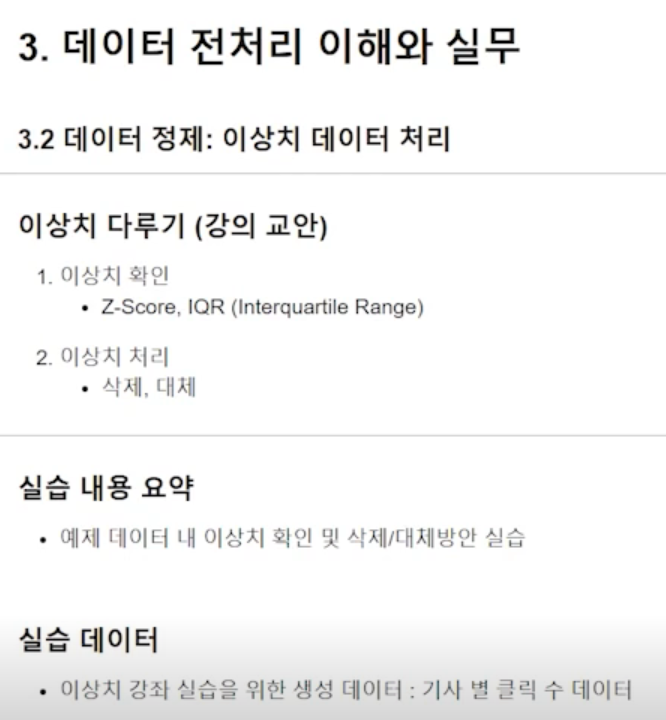

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
click_data = pd.read_csv('./click_sample_data.csv', encoding='cp949')
click_data.head(15)

In [ ]:
click_data.info()
click_copy = click_data.copy()

In [ ]:
click_copy['num_click'].describe() 
# 최대 433992, 최소 9회 클릭 / 75% 수준의 클릭수는 1000회 정도의 결과를 보여주므로, 일부 이상치 데이터가 존재하는 것으로 보여짐

## 이상치 처리하기 - Z-score 컬럼생성

z = (x-mean) / std.dev
z = (해당 관측치 - 관측치 변수 평균) / 관측치 변수의 표준편차

In [ ]:
click_copy['z_score'] = (click_copy['num_click'] - np.mean(click_copy['num_click'])) / np.std(click_copy['num_click'])
click_copy.head()

In [ ]:
click_copy.describe()
# -3, 3 벗어나면 이상치로 판단 # ★

In [ ]:
# 이상치 삭제
click_copy = click_copy[(click_copy['z_score'] < 3 ) & (click_copy['z_score'] > -3)]
click_copy['z_score'].info()

In [ ]:
click_copy.describe()

### Scipy내 z-score 함수 제공 #★

In [ ]:
from scipy.stats import zscore
click_copy = click_data.copy()

click_copy['z_score'] = zscore(click_copy['num_click'])
click_copy = click_copy[ (click_copy['z_score']<3) & (click_copy['z_score']>-3)]
click_copy.shape

In [ ]:
click_copy.describe() # 위 기존과 동일

### IQR 기반 이상치 처리 #★

In [ ]:
click_copy = click_data.copy()

In [ ]:
q1 = click_copy['num_click'].quantile(0.25)
q3 = click_copy['num_click'].quantile(0.75)

# IQR
iqr = (q3 - q1)
iqr

In [ ]:
click_copy = click_copy[ (click_copy['num_click'] > (q1 - 1.5*iqr)) & (click_copy['num_click']<(q3+1.5*iqr))]
click_copy.describe()

In [ ]:
# 이상치 제거후 데이터 확인
print(np.shape(click_copy))

## 이상치 대체하기

In [ ]:
click_copy = click_data.copy()

In [ ]:
# 대체할 기준 정의
max_click = 1000

In [ ]:
# 정의된 기준으로 대체 후 비교를 위해 컬럼 복사
click_copy['new_num_click'] = click_copy['num_click']

# 이상치 대체
click_copy.loc[click_copy['new_num_click']>max_click, 'new_num_click'] = max_click
click_copy.describe()

In [ ]:
click_copy.info()

In [ ]:
# 일반적으로 이상치 대체 및 변경은 기존 도메인 지식 및 현업 담당자와의 협의를 통해 진행
# 위 데이터 예제에서 기사 클릭수의 max값을 1000회로 정의하고 1000회 이상의 값은 모두 1000회로 대체

## 3-3 데이터 변환 – 정규화, 구간화

In [ ]:
import numpy as np
import pandas as pd

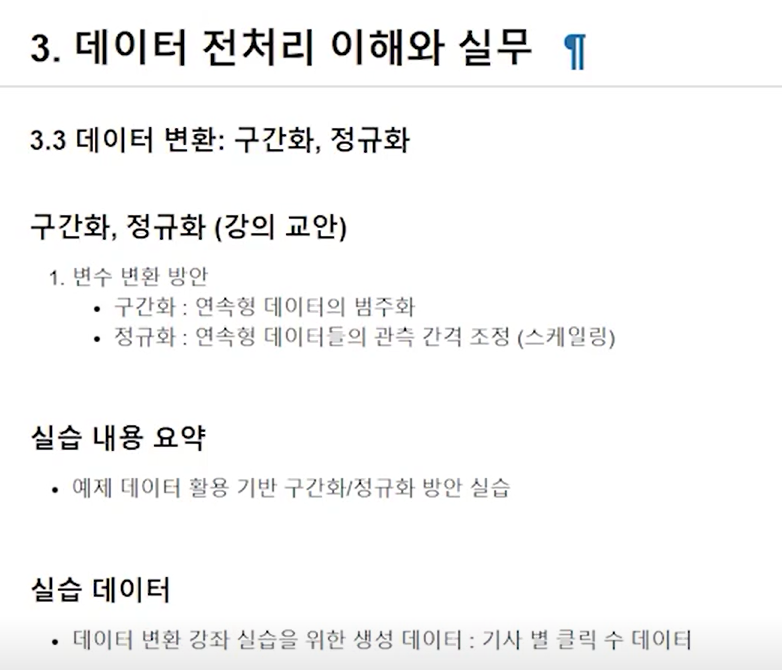

In [ ]:
click_data = pd.read_csv('./click_sample_data.csv', encoding='cp949')
click_data

In [ ]:
click_data.info()

click_copy = click_data.copy()

## 구간화 (Binning)
1. 지정 길이 기반 구간 : 데이터 범위를 사용자의 기준대로 정의하고 구간화
2. 분포 기간 부간 : 데이터가 모든 구간 내 동일한 개수로 구분되도록 구간화

In [ ]:
click_copy.describe()

- 기사 클릭수가 20회미만 기사와 10회인 기사 비교
- 20회 클릭된 기사가 2배 더 흥미있는 기사로 정의할 수 있는가?
-> No, 기사의 카테고리, 저널 등 클릭을 유도하는 여러 요소가 있기때문

- 따라서 구간화를 통해 새로운 의미를 지닌 변수로 변환이 필요하며, 목적 설정이 중요함
- 클릭 횟수를 기준으로 범주로 변환하여 각 범주별 의미 설정 가능(도메인 지식 검토 필요)

## 지정 길이 기반 구간화

In [ ]:
# 클릭수 기반으로 기사 관심도 정의 기반 범주형 변환 (3개 구간간 설정)

# cout 함수 활용기반 구간 설정(사용자 기준)
bin=[0, 100, 500, np.max(click_copy['num_click'])] 
names=['low','medium','high']

click_copy['pref'] = pd.cut(click_copy['num_click'], bins, labels=names) #★
click_copy

In [ ]:
click_copy['pref'].value_counts

## 분포기반 구간화

In [ ]:
# qcut의 경우 동일한 관측치가 배치되도록 구간을 분할
# 따라서 구간수로 나누게됨, 구간수 =n
n=3
click_copy['pref_qcut'] = pd.qcut(click_copy['num_click'],n, labels=names)#★
print(click_copy['pref_qcut'].value_counts)

qcut 실행시 주로 발생하는 오류 이류
- 데이터가 극단치의 Skewed한 경우 발생
- 데이터의 각 구간은 동일할 수 없기 때문
- [1,1,1,1,1,3,8,10] 이라는 구간은 생성 불가능
- 그러한 경우에는 분포기반 구간화(qcut)보다 사용자 기준 범주화 혹은 구간 개수 변화 고려필요

## 정규화

기계학습 알고리즘의 각 변수별 영향력의 차이를 조정할 필요 존재함
- 각 변수별 범위가 다를 경우 학습안정성이 떨어질 수 있으므로 간격 조정 필요
1. 최대-최소 정규화(min-max scaling) : 변수 값을 [0,1] 사이의 값을 갖도록 구성, 데이터 내에서 특정 데이터가 가지는 위치를 보고자 할때 사용
2. z-score 정규화(표준화 standardization) : 특정 데이터가 평균(0)을 기준으로 얼마나 떨어져 있는지를 파악하고, 측정 스케일이 다른경우의 데이터를 비교하는데 사용. 변수를 평균0, 표준편차 1인 표준정규분포로 변환

### Min-maxscaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler #★
scaler = MinMaxScaler()

click_copy = click_data.copy()

# 변환
click_copy['minmax_values'] = scaler.fit_transform(click_copy[['num_click']])
click_copy.head(15)

In [ ]:
click_copy.describe()

NameError: name 'click_copy' is not defined

### 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler #★
std_scaler = StandardScaler()

# 변환
click_copy['std_values'] = std_scaler.fit_transform(click_copy[['num_click']])
click_copy.head(15)

In [ ]:
click_copy.describe()

어느 방안이 더 나은가?

- 상황에 따라 달라짐, 정규화 수행과ㅁ 안한 결과의 차이가 큰 것이 중요 포인트
- 연속형 데이터를 기계학습 모델링에 적용하기 위해서 변수간의 상대적 크기 차이를 줄이는 과정이 필요함
- 예)
- - 대표적 비지도학습인 군집화 분석 중 k-means는 수치형 변수로 적용하는 알고리즘
- - 변수간 수치적 distance를 연산하여 유사한 집단으로 묶는 알고리즘
- - 변수가 각자 다른 범위를 가진경우 유사집단 구성 시, 변수 간 영향력의 차이가 반영되어 올바르지 못한 결과도출 가능성 존재 


## 3-4 데이터 변환 – 특징 생성

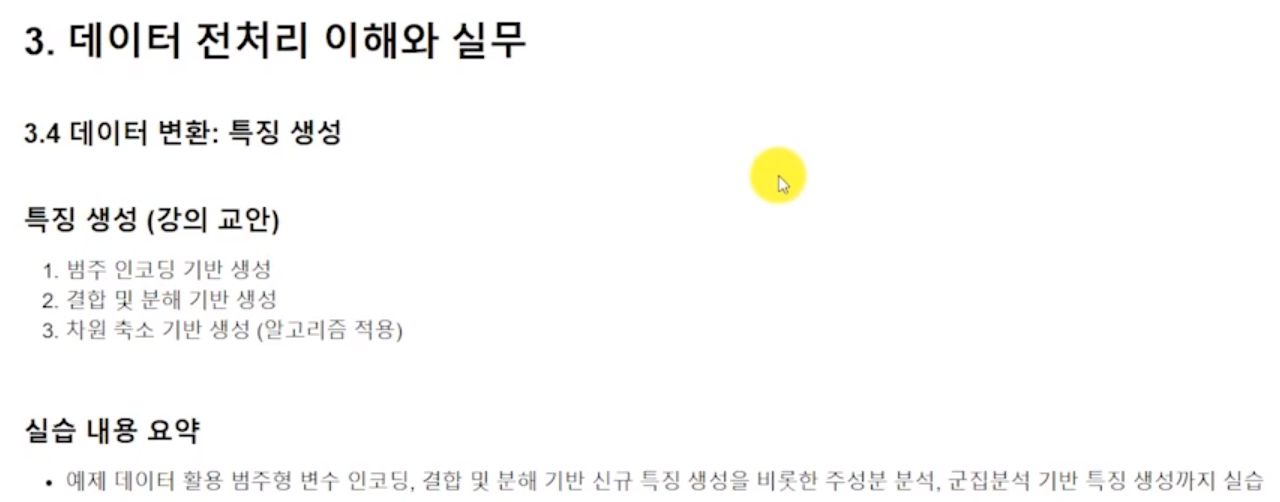

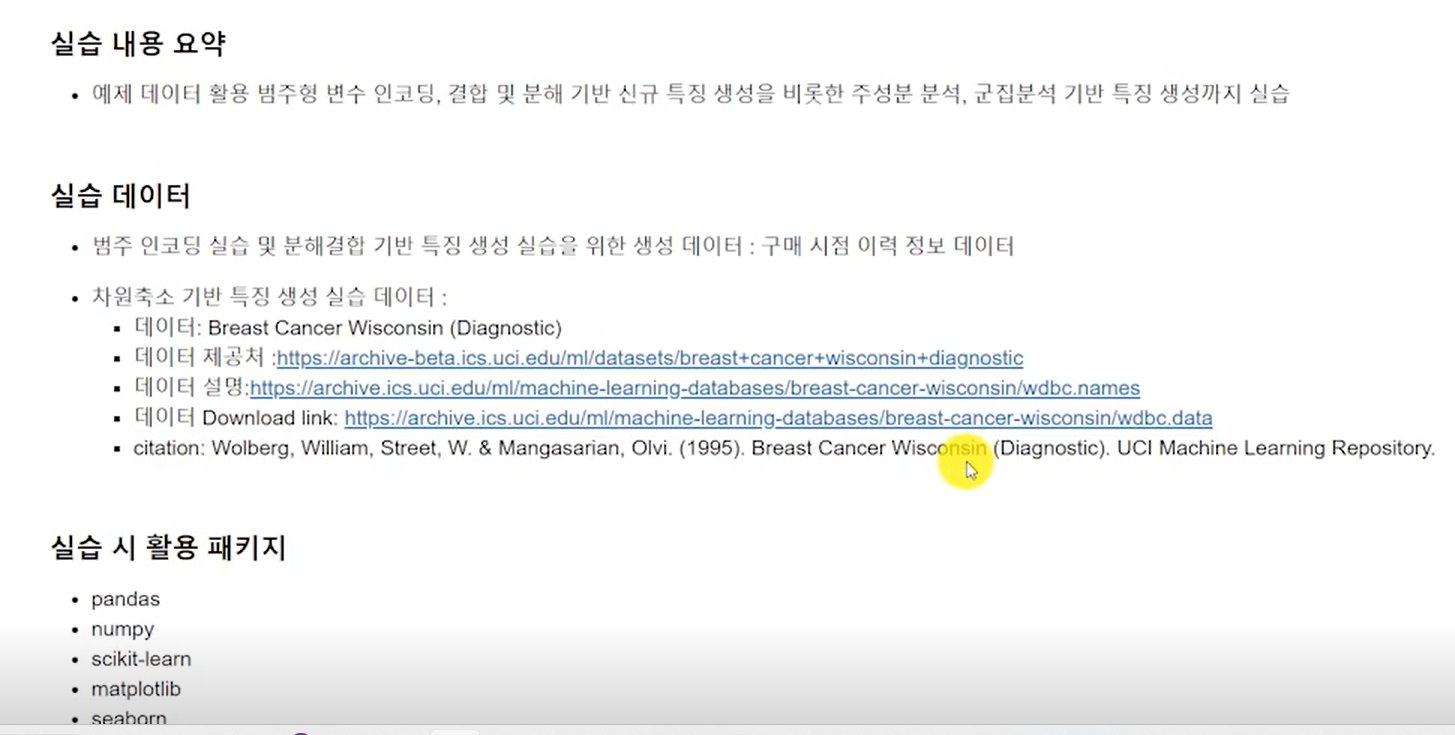

## 범주인코딩
- 숫자로 표현되지 않은 데이터를 수치형으로 표현하고 모델링에 적용하기 위한 과정

In [ ]:
import numpy as np
import pandas as pd

data = pd. read_csv('./data.csv', encoding='cp949')
data.head()

FileNotFoundError: [Errno 2] No such file or directory: './data.csv'

In [ ]:
data['city'].value_counts()

In [ ]:
# 원핫 인코딩 #★
# city라는 범주형 변수 원핫인코딩 / pandas의 get_dummies 함수 활용

encoding_data = data.copy()
encoding_data = pd.get_dummies(encoding_data, columns=['city'])
encoding_data.head()

# 기존 city 변수내 5개의 범주가 존재
# get_dummies 함수를 통해 원본 데이터의 city변수 대신 각 범주별 변수가 생성 (1->5개 변수)

- 원핫 인코딩은 각 범주의 요소마다 별도 칼럼으로 생성하여 True/False를 표현
- 기계학습의 많은 알고리즘은 수치형 데이터를 입력값으로 받아야함
- 따라서, 범주형 변수의 원핫인코딩 기법을 활용하여 기계학습 적용의 제약점을 해소 가능 

## 결합 및 분해기반 특징 생성
- 기존 원본데이터에 나타나지 않는 새변수생성, 데이터 특성 파악, 모델링 도움주기 위함

In [ ]:
# 시간대별 파악 목적
# 어느 ㅣ간대 혹은 요일별로 구매 결정이 높아지는지 확인하고자 할때

creatin_data = data.copy()
creatin_data.info()

In [ ]:
# 기존 범주형 변수인 data 컬럼을 datetime 형식으로 변환
creatin_data['date'] = pd.to_datetime(creatin_data['date'])
creatin_data.head()

In [ ]:
creatin_data.info()

In [ ]:
# date 컬럼을 연/월/일/요일 등의 의미를 지닌 변수로 분해
creatin_data['year'] = creatin_data['date'].dt.year #연도
creatin_data['month'] = creatin_data['month'].dt.month #월
creatin_data['day'] = creatin_data['day'].dt.day #일
creatin_data['c'] = creatin_data['day'].dt.day #시간
creatin_data['dayofweek'] = creatin_data['date'].dt.dayofweek #요일(월=0)
creatin_data.head()


In [ ]:
# 오전/오후 변수생성
creatin_data['ampm'] = 'AM'
creatin_data.loc[creatin_data['hour']>12, 'ampm'] = 'PM'
creatin_data

- 연/월/일 등을 분석가 기준에 맞춰 시간대의 의미를 지닌 신규 파생변수로 분해 및 결합 가능
- dayofweek 변수의 경우 평일/주말 파생변수 생성가능

## 차원축소기반 특징 생성(1) : PCA (주성분 분석) #★
- 여러개의 변수를 지닌 고차원 데이터를 저차원으로 변환하도로 주성분들을 생성하는 알고리즘
- 원 변수들이 지닌 정보를 최대한 확보하는 저차원 데이터로 생성하는 방법

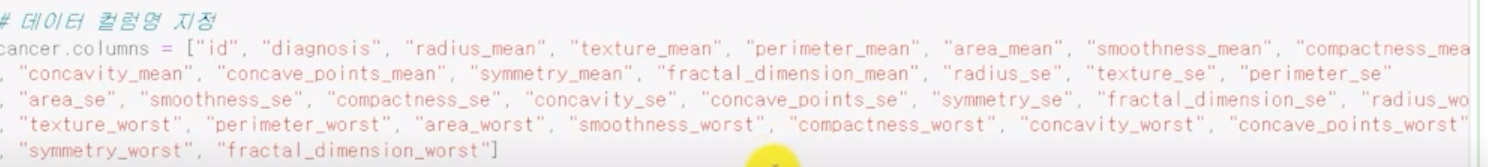

In [ ]:
# Breast Cancer 데이터 활용기반 실습
cancer = pd.read_csv('./wdbc.data', header=None)

# 데이터 컬럼명 지정
cancer.columns = []

# ID를 index화
cancer = cancer.set_index('id')

In [ ]:
# input 및 target 구분
input_df = cancer.drop(['diagnosis'], axis=1)
print(np.shae(input_df))

target_df = cancer[['diagnosis']]
print(np.shape(target_df))

In [ ]:
# 30개의 독립변수(input 변수)로 이뤄진 데이터를 주성분 분석
# 주성분분석 수행전, 각변수의 스케일이 서로 다르기 때문에 표준화 수행

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

# input값을 scaling 실행후 변환
std_scaler.fit(input_df)
input_scaled = std_scaler.transform(input_df)
input_scaled # array형태로 변환됨


In [ ]:
# 주성분 분석 수행 #★
from sklearn.decomposition import PCA

# 두개의 주성분만 유지시키도록 수행
# 30개 변수의 데이터를 2개의 주성분으로 남도록 변환

pca = PCA(n_components=2)
pca.fit(input_scaled)
X_pca=pca.transform(input_scaled)
X_pca

In [ ]:
# PCA로 수행됨 input 데이터 확인, 2개의 주성분 확인
X_pca_df = pd.DataFrame(X_pca, columns=['pc1','pc2'])
X_pca_df

# 30개의 변수를 지닌 데이터가 2개의 특징들로 압축되었음

In [ ]:
 # 2개의 주성분으로 구성됨 컬럼들이 targerㅇ르 구분하기에 효율적인지 시각화로 확인
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 산점도로 2개의 주성분을 시각화
ax = sns.scatterplot(x='pc1', y='pc2', data=X_pca_df)

In [ ]:
# target과 확인을 위해 주성분 분석을 수행한 input 데이터와 target 데이터를 merge
# pca_df 생성 : 2개의 주성분(input) 및 1개의 target(diagnosis)

target_df = target_df.reset_index()
pca_df = pd.merge(X_pca_df, target_df, left_index=True, right_index=True, how='inner')
pca_df = pca_df[['pc1','pc2','diagnosis']]
pca_df

In [ ]:
# 클래스를 색깔로 구분하여 처음 두개의 주성분으로 target과 비교
ax = sns.scatterplot(x='pc1', y='pc2', hue='diagnosis', data=pca_df, palette=['green', 'red']

- 실제 모델링에 적용하기 위해 효율적으로 활용 가능한 주성분 분석
- 특히, record 및 컬럼이 많은 경우 모델링 연산 비용이 많이 들게 되므로 효율적인 차원축소 기반의 특징을 생성하는 것이 분석과정내 필요한 과정

## 주성분 선택 방법2

- 분산의 설명비율을 선택 가능
- 유지시킬 주성분 개수가 아닌 분산의 설명가능 수준을 비율로 선택가능
- 주성분분석 개수지정이 아닌 전체 원본데이터의 분산을 특정 비율이상 설명하는 수준으로 선택하는 방법
- - pca=PCA(n_componenets=.8):
- - 주성분의 수는 전체분산의 최소 80% 수준에서 설명하는 수준에서 자동으로 선택
- 이를통해 수치를 변경하면서 추출되는 주성분의 수 확인가능하며, 이는 분산에 기초한 주성분 개수를 선택하는 부분에서 얼마나 많은 주성분을 사용할 것인지 확인해야 할때 사용 가능



In [ ]:
# 전체 분산의 최소 80% 수준에서 설명하는 수준의 주성분 확보 
pca=PCA(n_componenets=.8)
pca.fit(input_scaled)
X_pca = pca.transform(input_scaled)
X_pca_df = pd.DataFrame(X_pca)
X_pca_df

## 차원축소 기반 특징생성(2) : Clustering(군집분석)
- 여러개의 변수를 하나의 변수(군집결과)로 변환 차원축소
- 추후 분류/회귀에 사용가능 #★

In [ ]:
# 연속형 변수이므로 kmeans활용
from sklearn.cluster import KMeans

In [ ]:
# 일부 변수만 선택(30개 변수중 15개의 변수만 임의로 선정)
# 즉 활용할 정보의 양을 절반으로 축소
subset_df = input_df.iloc[:,0:15]
subset_df

In [ ]:
# 스케일링
std_scaler.fit(subset_df)
subset_input_scaled = std_scaler.transform(subset_df)
subset_input_scaled

In [ ]:
# K-means 클러스터링 활용
k=5
model = KMeans(n_clusters=k, random_state=10)

# 스케일링한 데이터를 fit하여 모델학습
model.fit(subset_input_scaled)

# 클러스터링 결과를 타겟 변수와 비교하기 위하여 원 데이터에 컬럼으로 생성
target_df['cluster'] = model.fit_predict(subset_input_scaled)
target_df

In [ ]:
# 15개의 임의의 변수로 만들어진 하나의 특징(군집결과)과 기존 target변수 비교
pd.crosstab(target_df.diagnosis, target_df.cluster)

- 임의의 15개 변수만을 활용한 하나의 특징(군집결과)이 Target구분에 효율적일 것임을 예측가능함
- 이처럼 많은 변수를 하나의 특징으로 구성하고, 입력 데이터의 차원을 줄인다면 모델 연산 비용 절감에 효과적

## 3-5 데이터 축소 – 특징 선택



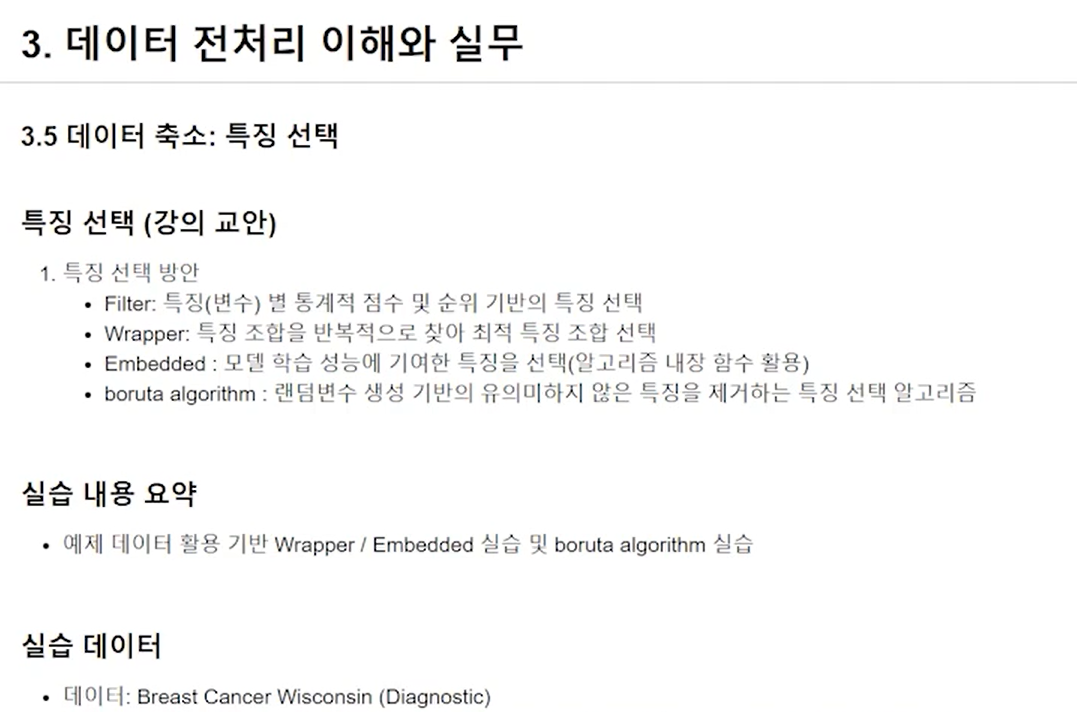

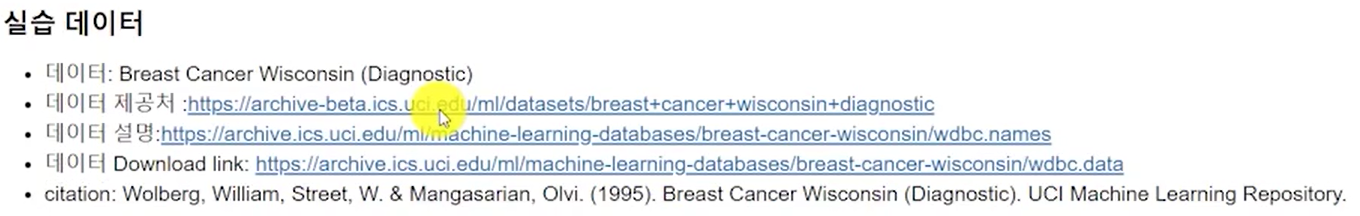

In [ ]:
# https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Breast Cancer 데이터 활용기반 실습
cancer = pd.read_csv('./wdbc.data', header=None)
cancer.rename(columns={0: 'id', 1:'diagnosis'}, inplace=True)

# # ID를 index화
cancer = cancer.set_index('id')
cancer

diagnosis      2      3       4       5        6        7        8  \
id                                                                            
842302           M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
842517           M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
84300903         M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
84348301         M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
84358402         M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
...            ...    ...    ...     ...     ...      ...      ...      ...   
926424           M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
926682           M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
926954           M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
927241           M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
92751            B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

                9      10  ...      22     23      24      25       26  \
id                         ...                                           
842302    0.14710  0.2419  ...  25.380  17.33  184.60  2019.0  0.16220   
842517    0.07017  0.1812  ...  24.990  23.41  158.80  1956.0  0.12380   
84300903  0.12790  0.2069  ...  23.570  25.53  152.50  1709.0  0.14440   
84348301  0.10520  0.2597  ...  14.910  26.50   98.87   567.7  0.20980   
84358402  0.10430  0.1809  ...  22.540  16.67  152.20  1575.0  0.13740   
...           ...     ...  ...     ...    ...     ...     ...      ...   
926424    0.13890  0.1726  ...  25.450  26.40  166.10  2027.0  0.14100   
926682    0.09791  0.1752  ...  23.690  38.25  155.00  1731.0  0.11660   
926954    0.05302  0.1590  ...  18.980  34.12  126.70  1124.0  0.11390   
927241    0.15200  0.2397  ...  25.740  39.42  184.60  1821.0  0.16500   
92751     0.00000  0.1587  ...   9.456  30.37   59.16   268.6  0.08996   

               27      28      29      30       31  
id                                                  
842302    0.66560  0.7119  0.2654  0.4601  0.11890  
842517    0.18660  0.2416  0.1860  0.2750  0.08902  
84300903  0.42450  0.4504  0.2430  0.3613  0.08758  
84348301  0.86630  0.6869  0.2575  0.6638  0.17300  
84358402  0.20500  0.4000  0.1625  0.2364  0.07678  
...           ...     ...     ...     ...      ...  
926424    0.21130  0.4107  0.2216  0.2060  0.07115  
926682    0.19220  0.3215  0.1628  0.2572  0.06637  
926954    0.30940  0.3403  0.1418  0.2218  0.07820  
927241    0.86810  0.9387  0.2650  0.4087  0.12400  
92751     0.06444  0.0000  0.0000  0.2871  0.07039  

[569 rows x 31 columns]

In [ ]:
# pip install scikit-learn


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.drop(['diagnosis'], axis=1), cancer[['diagnosis']], random_state=1)
#★
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [ ]:
train_df = pd.merge(X_train, y_train, left_index=True, right_index=True, how='inner')
train_df

2      3       4       5        6        7        8         9  \
id                                                                            
925622    15.22  30.62  103.40   716.9  0.10480  0.20870  0.25500  0.094290   
8915      14.96  19.10   97.03   687.3  0.08992  0.09823  0.05940  0.048190   
848406    14.68  20.13   94.74   684.5  0.09867  0.07200  0.07395  0.052590   
922577    10.32  16.35   65.31   324.9  0.09434  0.04994  0.01012  0.005495   
891703    11.85  17.46   75.54   432.7  0.08372  0.05642  0.02688  0.022800   
...         ...    ...     ...     ...      ...      ...      ...       ...   
866674    19.79  25.12  130.40  1192.0  0.10150  0.15890  0.25450  0.114900   
869254    10.75  14.97   68.26   355.3  0.07793  0.05139  0.02251  0.007875   
859717    17.20  24.52  114.20   929.4  0.10710  0.18300  0.16920  0.079440   
88249602  14.03  21.25   89.79   603.4  0.09070  0.06945  0.01462  0.018960   
854941    13.03  18.42   82.61   523.8  0.08983  0.03766  0.02562  0.029230   

              10       11  ...     23      24      25       26       27  \
id                         ...                                            
925622    0.2128  0.07152  ...  42.79  128.70   915.0  0.14170  0.79170   
8915      0.1879  0.05852  ...  26.19  109.10   809.8  0.13130  0.30300   
848406    0.1586  0.05922  ...  30.88  123.40  1138.0  0.14640  0.18710   
922577    0.1885  0.06201  ...  21.77   71.12   384.9  0.12850  0.08842   
891703    0.1875  0.05715  ...  25.75   84.35   517.8  0.13690  0.17580   
...          ...      ...  ...    ...     ...     ...      ...      ...   
866674    0.2202  0.06113  ...  33.58  148.70  1589.0  0.12750  0.38610   
869254    0.1399  0.05688  ...  20.72   77.79   441.2  0.10760  0.12230   
859717    0.1927  0.06487  ...  33.82  151.60  1681.0  0.15850  0.73940   
88249602  0.1517  0.05835  ...  30.28   98.27   715.5  0.12870  0.15130   
854941    0.1467  0.05863  ...  22.81   84.46   545.9  0.09701  0.04619   

               28       29      30       31  diagnosis  
id                                                      
925622    1.17000  0.23560  0.4089  0.14090          M  
8915      0.18040  0.14890  0.2962  0.08472          B  
848406    0.29140  0.16090  0.3029  0.08216          M  
922577    0.04384  0.02381  0.2681  0.07399          B  
891703    0.13160  0.09140  0.3101  0.07007          B  
...           ...      ...     ...      ...        ...  
866674    0.56730  0.17320  0.3305  0.08465          M  
869254    0.09755  0.03413  0.2300  0.06769          B  
859717    0.65660  0.18990  0.3313  0.13390          M  
88249602  0.06231  0.07963  0.2226  0.07617          B  
854941    0.04833  0.05013  0.1987  0.06169          B  

[426 rows x 31 columns]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

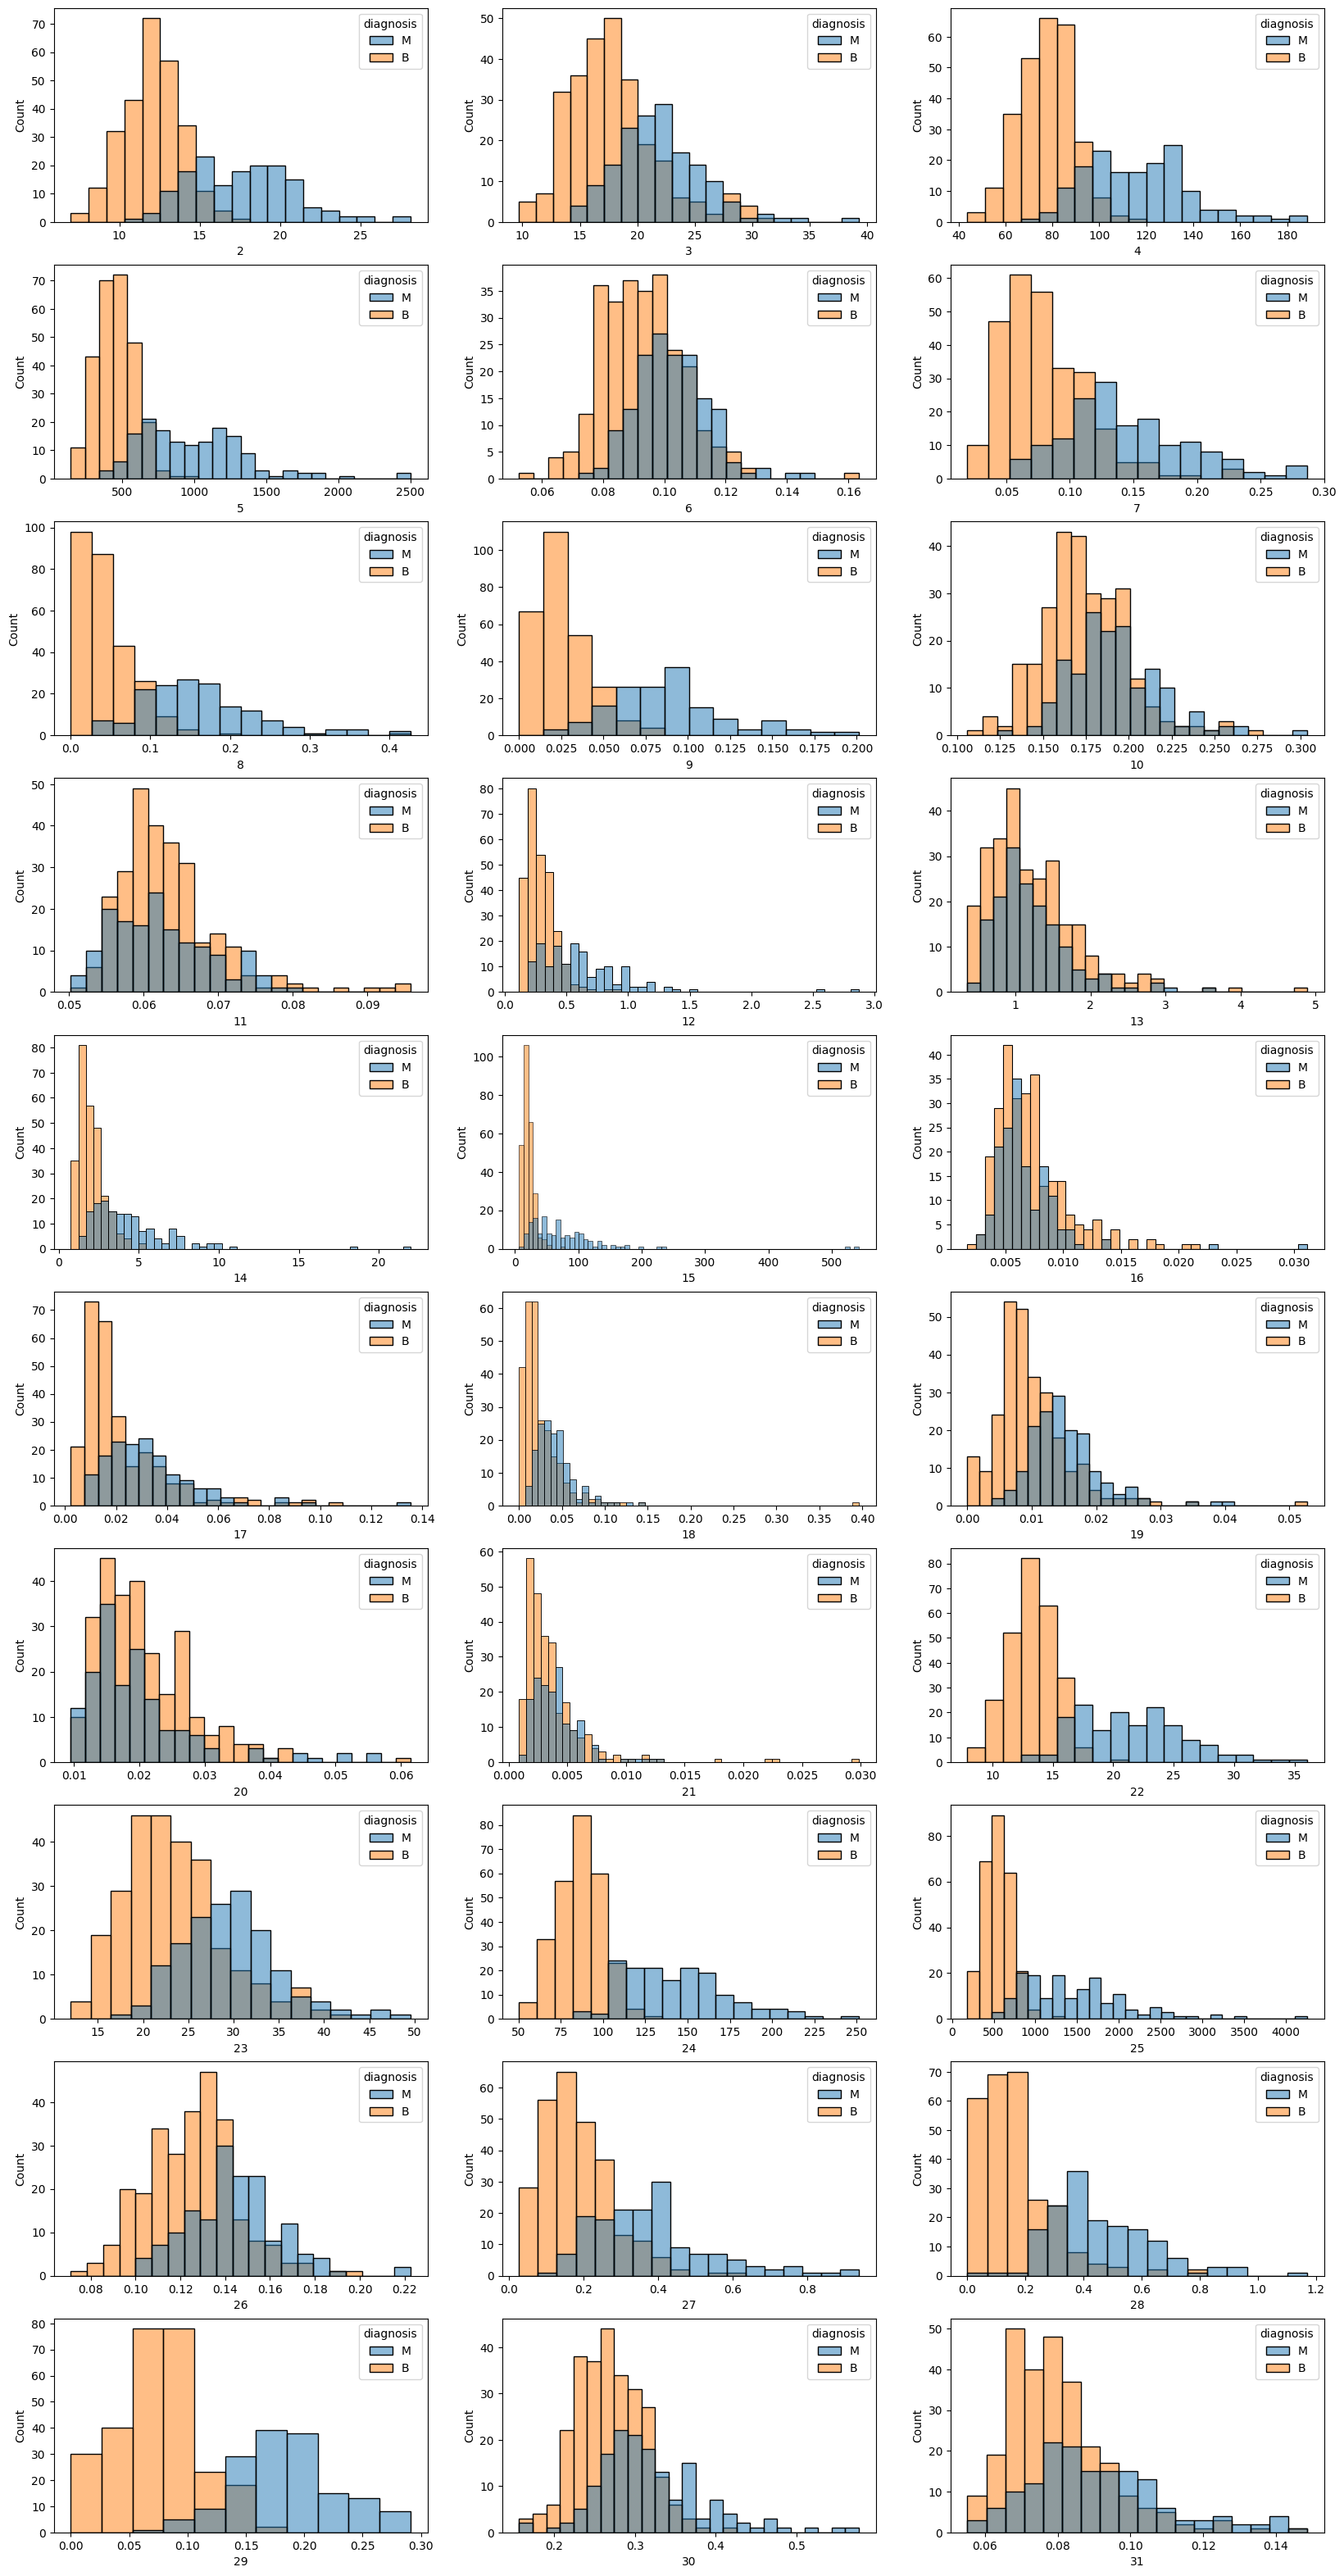

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(20,40))
axes = axes.flatten()

for i in range(30):
    sns.histplot(data=train_df, x=train_df.columns[i], hue='diagnosis', multiple='layer',ax=axes[i])

plt.show()

In [ ]:
# 시각화 기반 특징들의 유의미함 예상

## RFE 기반 주요특징 선택(wraper방식 대표적방식)

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

In [ ]:
# SVM 기반의 RFE 방식 래퍼런스

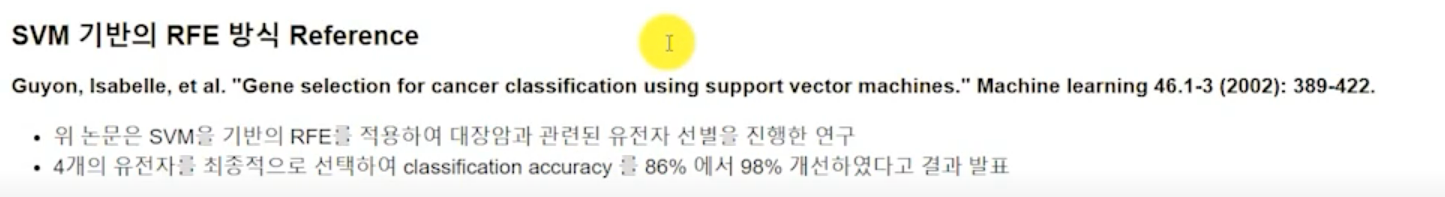

In [ ]:
# SVM 기반 RFE 수행 #★
from sklearn.preprocessing import StandardScaler
# 스케일에 민감한 SVM의 특징에 따라 변수의 scaling을 따로 진행

scaler = StandardScaler()
scaler.fit(X_train)
scale_X_train = scaler.transform(s)

NameError: name 'X_train' is not defined

In [ ]:
# RFE를 적용할 모델 SVM 지정 #★
estimator_mdl = SVC(kernel='linear')
# SVM학습 기반의 RFE실행 및 유의미한 개수 지정 : 5개
svm_rfe = RFE(estimator = estimator_mdl, n_features_to_select=5)

svm_rfe_rst = svm_rfe.fit(scale_X_train, y_train.values.ravel())
svm_rfe_rst.ranking_ 
# 어떤컬럼 선택되었는지 확인
# 1로 나온 변수가 최종 유의미한 특징으로 도출된 컬럼

NameError: name 'SVC' is not defined

In [ ]:
# 도출한 특징조함으로 test
scale_X_test = scaler.transform(X_test) # train, test 동일기준으로 스케일링해야되서 transform만 진행 #★
prediction = pd.DataFrame(svm_rfe.predict(scale_X_test), columns=['pred_rst'])
prediction

NameError: name 'X_test' is not defined

In [ ]:
# 성능평가 위해 타겟데이터 클래스 문자->수치형 변경
y_test['diagnosis']=y_test['diagnosis'].replace('M',1)
y_test['diagnosis']=y_test['diagnosis'].replace('B',0)
y_test['diagnosis']


NameError: name 'y_test' is not defined

In [ ]:
prediction['pred_rst']=prediction['pred_rst'].replace('M',1)
prediction['pred_rst']=prediction['pred_rst'].replace('B',0)
prediction['pred_rst']

NameError: name 'prediction' is not defined

In [ ]:
# 성능확인 #★
from sklearn.metrics import accuracy_score
print('accuracy : ', round(accuracy_score(y_test['diagnosis'],prediction['pred_rst']),5))

from sklearn.metrics import roc_auc_score
print('auc : ', round(roc_auc_score(y_test['diagnosis'],prediction['pred_rst']),5))


NameError: name 'y_test' is not defined

In [ ]:
# 동일하게 SVM RFE 수행하되, 10개 특징을 선택

estimator_mdl = SVC(kernel='linear')

# SVM학습기반의 RFE 실행 및 유의미한 개수 지정 : 10개
re_svm_rfe = RFE(estimator = estimator_mdl, n_features_to_select=10)
re_svm_rfe_rst = re_svm_rfe.fit(scale_X_train, y_train.values.ravel())

re_prediction = pd.DataFrame(re_svm_rfe_rst.predict(scale_X_test), columns=['pred_rst'])
re_prediction['pred_rst'] = re_prediction['pred_rst'].replace('M', 1)
re_prediction['pred_rst'] = re_prediction['pred_rst'].replace('B', 0)


# 성능확인
print('accuracy : ', round(accuracy_score(y_test['diagnosis'],re_prediction['pred_rst']),5))
print('auc : ', round(roc_auc_score(y_test['diagnosis'],re_prediction['pred_rst']),5))
# 위의 5개의 성능이 더좋음

NameError: name 'SVC' is not defined

In [ ]:
# 최종 선택된 5개 특징컬럼 확인 #★
chk_var=[]
for name, svm_rfe_rst.ranking_ in zip(X_train.columns, svm_rfe_rst.ranking_): # 묶어서 호출
    lst_chk = [name, svm_rfe_rst.ranking_]
    chk_var.append(lst_chk)

chk_svm_rfe = pd.DataFrame(chk_var, columns=['feature_names','svm_rfe_feature'])
chk_svm_rfe = chk_svm_rfe[chk_svm_rfe['svm_rfe_feature']==1]
chk_svm_rfe

NameError: name 'X_train' is not defined

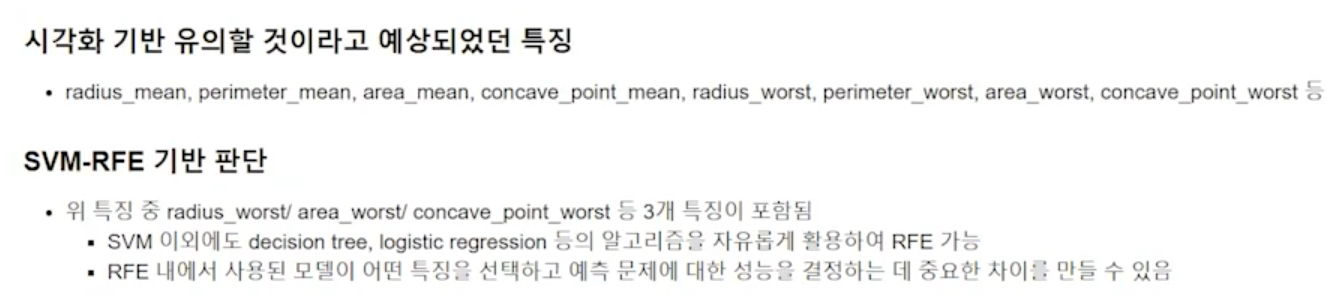

## Embedded 기반 특징 선택
- 모델학습 성능에 기여하는 특징을 선택하는 방법

In [ ]:
# RF모형 기반 특징선택
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# RF 모형 생성
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=1)) # n_estimators 나무수
embeded_rf_selector.fit(scale_X_train, y_train.values.ravel())

NameError: name 'scale_X_train' is not defined

In [ ]:
# RF기반 Embedded 특징 선택결과 ㅊㄴ
embeded_rf_support = embeded_rf_selector.get_support() # 데이터프레임 컬럼수 기반 True/False값 도출
embeded_rf_feature = X_train.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

9 selected features


In [ ]:
embeded_rf_feature # 컬럼 이름들임

[2, 4, 5, 8, 9, 22, 24, 25, 29]

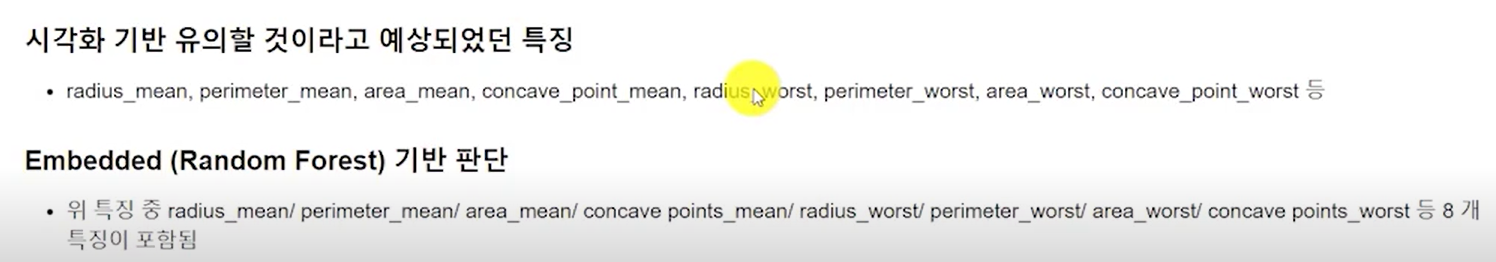

## Boruta Algorithm
- 보루타 알고리즘은 랜덤포레스트 기반 특징선택 알고리즘
- 기존 데이터를 임의로 복제하여 랜덤변수(shadow 변수)를 생성하고 그보다 낮은 중요도를 가진 특징을 제외함

In [ ]:
pip install boruta

     ---------------------------------------- 0.0/56.6 kB ? eta -:--:--
     ---------------------------- ----------- 41.0/56.6 kB 1.9 MB/s eta 0:00:01
     ---------------------------------------- 56.6/56.6 kB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from boruta import BorutaPy #★

In [ ]:
# 보루타 알고리즘은 랜덤포레스트 모형 기반이므로 먼저 RF모형설정
rf = RandomForestClassifier(random_state=1)

# 보루타 기반 특징선택
boruta_selector = BorutaPy(rf, n_estimators='auto', random_state=1)

# 'auto'인 경우는 자동으로 델이터셋 사이즈를 고려하여 자동설정
boruta_selector.fit(scale_X_train, y_train.values.ravel())
boruta_selector.ranking_

NameError: name 'scale_X_train' is not defined

In [18]:
# 최종선택된 특징 컬림이  어떠한 컬럼인지 확인
chk_var_borute=[]
for name, boruta_selector.ranking_ in zip(X_train.columns, boruta_selector.ranking_): 
    lst_chk = [name, boruta_selector.ranking_]
    chk_var_borute.append(lst_chk)


chk_boruta = pd.DataFrame(chk_var_borute, columns = ['feature_names', 'boruta_feature'])
chk_boruta = chk_boruta[chk_boruta['boruta_feature']==1]
chk_boruta

NameError: name 'X_train' is not defined

In [ ]:
# 보루타에 의해 선택된 특징개수
print(np.shape(chk_boruta))

In [ ]:
# 제외된 특징들 리스트 확인
non_chk_boruta = pd.DataFrame(chk_var_borute, columns=['feature_names', 'boruta_feature'])
non_chk_boruta = non_chk_boruta[non_chk_boruta['boruta_feature']!=1]
non_chk_boruta

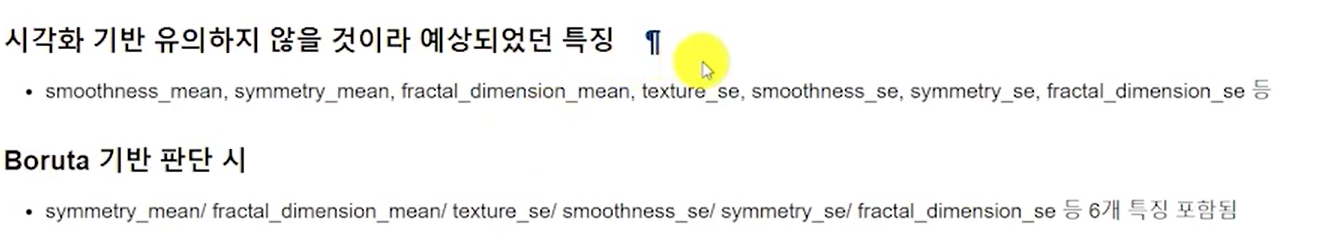

In [ ]:
import numpy as np